In [1]:
import sklearn
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X, y = mnist['data'], mnist['target']

In [2]:
print(X.shape)
X

(70000, 784)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [3]:
df = pd.DataFrame(X)
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# binarize data

In [4]:
def binarize_data(data):
    df = data.copy()
    return np.where(df > 0, 1, 0)

In [5]:
binarized_data = binarize_data(df)
print(set(binarized_data.flatten()))
# print(binarized_data.head())
binarized_df = pd.DataFrame(binarized_data)

{0, 1}


# mnist 28x28

In [6]:
df_concat = pd.concat([binarized_df, pd.DataFrame(y)], axis=1)
df_concat

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


# mnist 12x12

In [7]:
df2 = df.loc[:, (df != 0).any(axis=0)]
df2

,12,13,14,15,32,33,34,35,36,37,...,770,771,772,773,774,775,776,777,778,779
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
import numpy as np
from PIL import Image
import cv2  # OpenCV

# Assuming you have a 28x28 numpy array representing the image
def resize_methods(original_image):

    # Convert to uint8 because PIL can't handle 64-bit integer
    original_image = original_image.astype(np.uint8)


    # Method 1: PIL - resize (bilinear interpolation by default)
    # smoother results than nearest neighbor but is slightly slower
    pil_bilinear = np.array(Image.fromarray(original_image).resize((12, 12)))

    # Method 2: PIL (Python Imaging Library) - Nearest neighbor interpolation
    # fastest method but can produce pixelated results
    pil_nearest = np.array(Image.fromarray(original_image).resize((12, 12), Image.NEAREST))

    # bicubic interpolation
    # even smoother results, especially for upscaling, but is slower than bilinear.
    pil_bicubic = np.array(Image.fromarray(original_image).resize((12, 12), Image.BICUBIC))
    
    # Lanczos interpolation
    # highest quality results but is the slowest. It is particularly good for downscaling.
    pil_lanczos = np.array(Image.fromarray(original_image).resize((12, 12), Image.LANCZOS))


    return pil_bilinear, pil_nearest, pil_bicubic, pil_lanczos


In [9]:
print(binarized_data[0].reshape(28, 28))
resize_methods(binarized_data[27].reshape(28, 28))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 

(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1,

In [10]:
import matplotlib.pyplot as plt
def visualize_resize_comparison(before_resize, *after_resize_methods):
    """
    Visualize before and after resize images for multiple resize methods
    
    Parameters:
    -----------
    before_resize : numpy.ndarray
        Original image array before resizing
    *after_resize_methods : numpy.ndarray
        Variable number of resized image arrays from different interpolation methods
    """
    # Calculate the number of subplots needed
    num_methods = len(after_resize_methods)
    
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(1, num_methods + 1, figsize=(4 * (num_methods + 1), 4))
    
    # If only one method, convert axes to a list for consistent indexing
    if num_methods == 1:
        axes = [axes[0], axes[1]]
    
    # Plot original image
    axes[0].imshow(before_resize, cmap='gray')
    axes[0].set_title(f'Original Image\nShape: {before_resize.shape}')
    axes[0].axis('off')
    
    # Plot resized images
    resize_methods = ['Bilinear', 'Nearest', 'Bicubic', 'Lanczos']
    for i, resized_img in enumerate(after_resize_methods, 1):
        axes[i].imshow(resized_img, cmap='gray')
        axes[i].set_title(f'{resize_methods[i-1]}\nShape: {resized_img.shape}')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

In [27]:
def resize_and_visualize(data, index):
    """
    Resize and visualize an image from the dataset
    
    Parameters:
    -----------
    data : numpy.ndarray
        Dataset containing images
    index : int
        Index of the image to resize and visualize
    """
    # Reshape the image to 28x28 if it's a flattened array
    # if data[index].ndim == 2:
    original_img = data[index].reshape(28, 28)
    # else:
    #     original_img = data[index]


    # Get resized images using different methods
    resized_images = resize_methods(original_img)
    
    # Get the label if available
    label = y[index] if 'y' in globals() else 'Unknown'
    print(f'Label: {label}')
    
    # Visualize the original and resized images
    visualize_resize_comparison(original_img, *resized_images)
    print("")

In [62]:
def compare_binarize_resize_methods(data, index):
    """
    Compare the results of binarizing then resizing vs. resizing then binarizing an image
    
    Parameters:
    -----------
    data : numpy.ndarray
        Dataset containing images
    index : int
        Index of the image to process and compare
    """
    # Reshape the image to 28x28 if it's a flattened array
    original_img = data[index].reshape(28, 28)
    
    # Binarize then resize
    binarized_img = np.where(original_img > 0, 1, 0)
    resized_binarized_imgs = resize_methods(binarized_img)
    
    # Resize then binarize
    resized_imgs = resize_methods(original_img)
    binarized_resized_imgs = [np.where(img > 0, 1, 0) for img in resized_imgs]
    
    # Visualize the results
    fig, axes = plt.subplots(2, 5, figsize=(20, 12))  # Increased vertical size
    
    # Plot original image
    axes[0, 0].imshow(original_img, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')
    
    # Plot binarized then resized images
    resize_methods_names = ['Bilinear', 'Nearest', 'Bicubic', 'Lanczos']
    for i, img in enumerate(resized_binarized_imgs):
        axes[0, i + 1].imshow(img, cmap='gray')
        axes[0, i + 1].set_title(f'Binarized then {resize_methods_names[i]}')
        axes[0, i + 1].axis('off')
    
    # Plot resized then binarized images
    axes[1, 0].imshow(original_img, cmap='gray')
    axes[1, 0].set_title('Original Image')
    axes[1, 0].axis('off')
    
    for i, img in enumerate(binarized_resized_imgs):
        axes[1, i + 1].imshow(img, cmap='gray')
        axes[1, i + 1].set_title(f'{resize_methods_names[i]} then Binarized')
        axes[1, i + 1].axis('off')
    
    # Adjust the vertical space between rows
    plt.subplots_adjust(hspace=0.00005)  # Increase horizontal space between subplots
    
    plt.tight_layout()
    plt.show()

# Example usage
# compare_binarize_resize_methods(binarized_data, 27)

In [59]:
import random
def visualize_digits_sample(data, labels, num_total_samples=15):
    """
    Visualize a sample of images, ensuring at least one instance of each digit
    
    Parameters:
    -----------
    data : numpy.ndarray
        Dataset of images
    labels : numpy.ndarray
        Corresponding labels for the images
    num_total_samples : int, optional
        Total number of images to sample (default: 20)
    
    Returns:
    --------
    List of sampled image indices
    """
    # Ensure we have at least one sample per digit
    sampled_indices = []
    
    # First, find at least one instance of each digit (0-9)
    for digit in range(10):
        # Find indices of this digit
        digit_indices = np.where(labels == digit)[0]
        
        if len(digit_indices) > 0:
            # Select a random index for this digit
            sampled_indices.append(random.choice(digit_indices))
    
    # If we need more samples, fill the rest randomly
    remaining_samples = num_total_samples - len(sampled_indices)
    
    # Get all indices not yet sampled
    all_indices = set(range(len(labels)))
    used_indices = set(sampled_indices)
    available_indices = list(all_indices - used_indices)
    
    # Add random samples to reach total number of samples
    if remaining_samples > 0:
        additional_samples = random.sample(available_indices, min(remaining_samples, len(available_indices)))
        sampled_indices.extend(additional_samples)
    
    # Visualize the sampled images
    for index in sampled_indices:
        # resize_and_visualize(data, index)
        compare_binarize_resize_methods(data, index)
    
    return sampled_indices

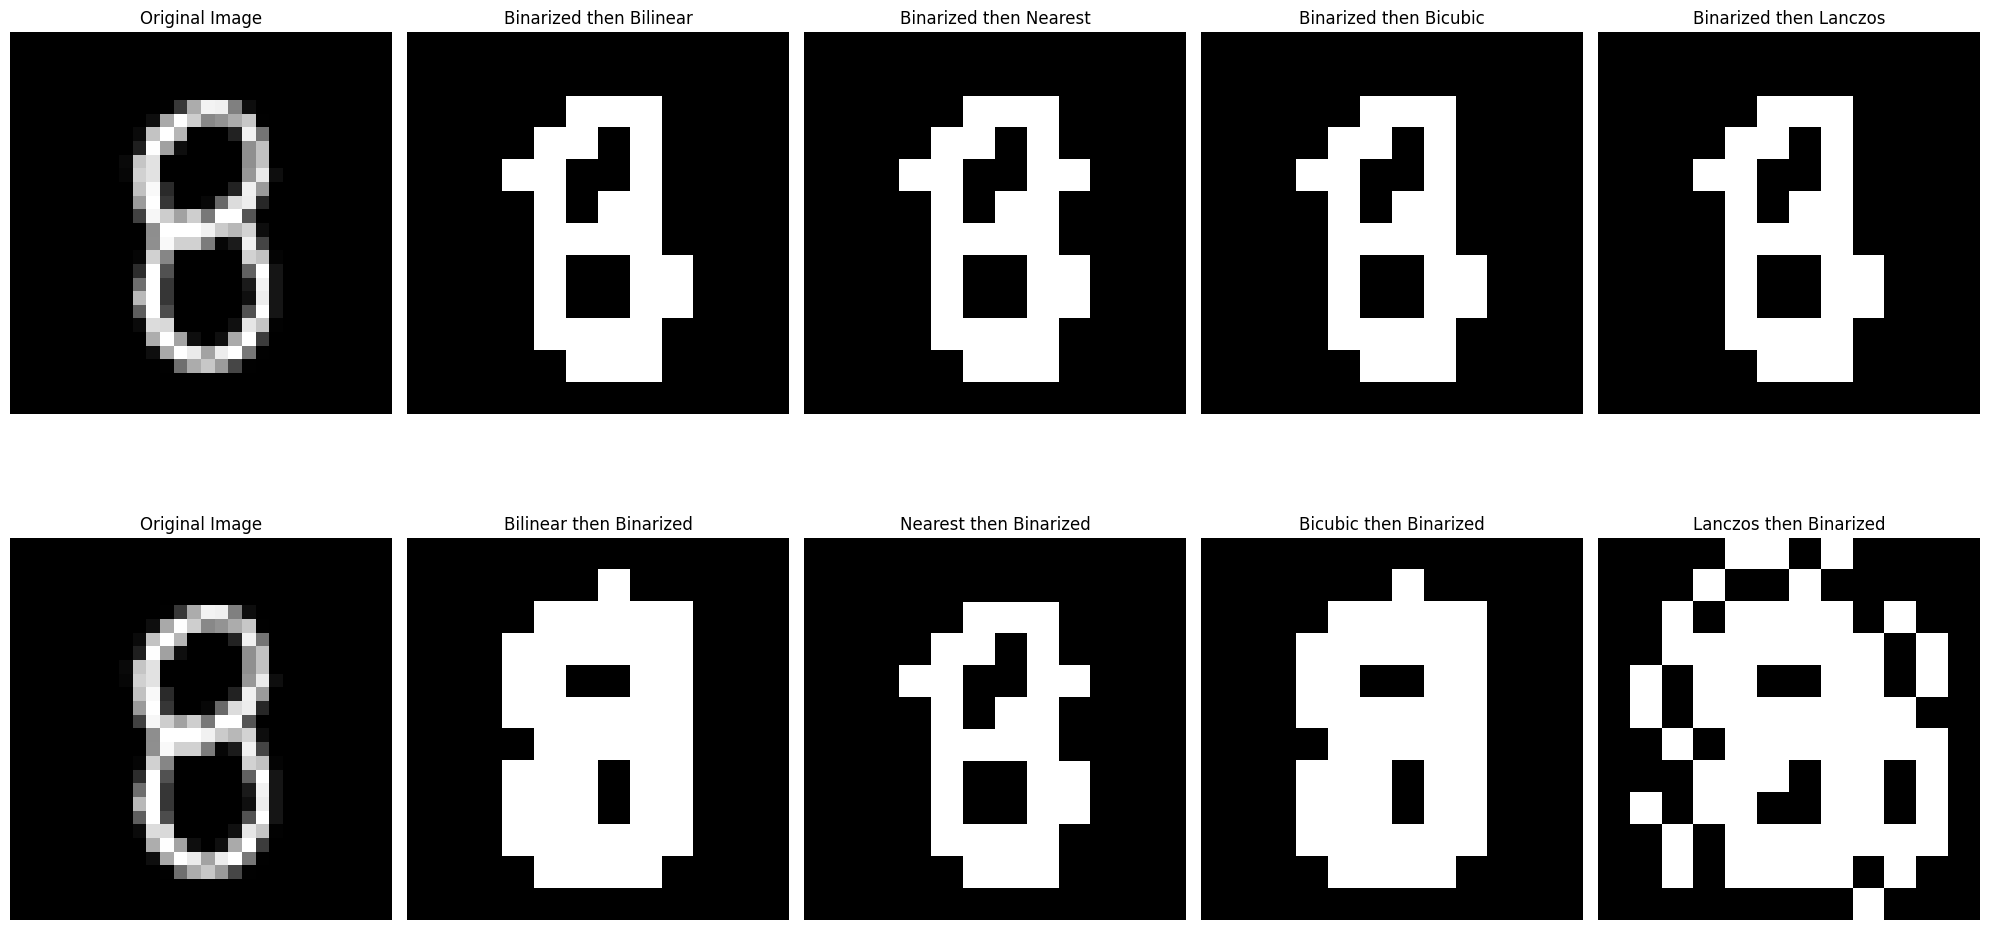

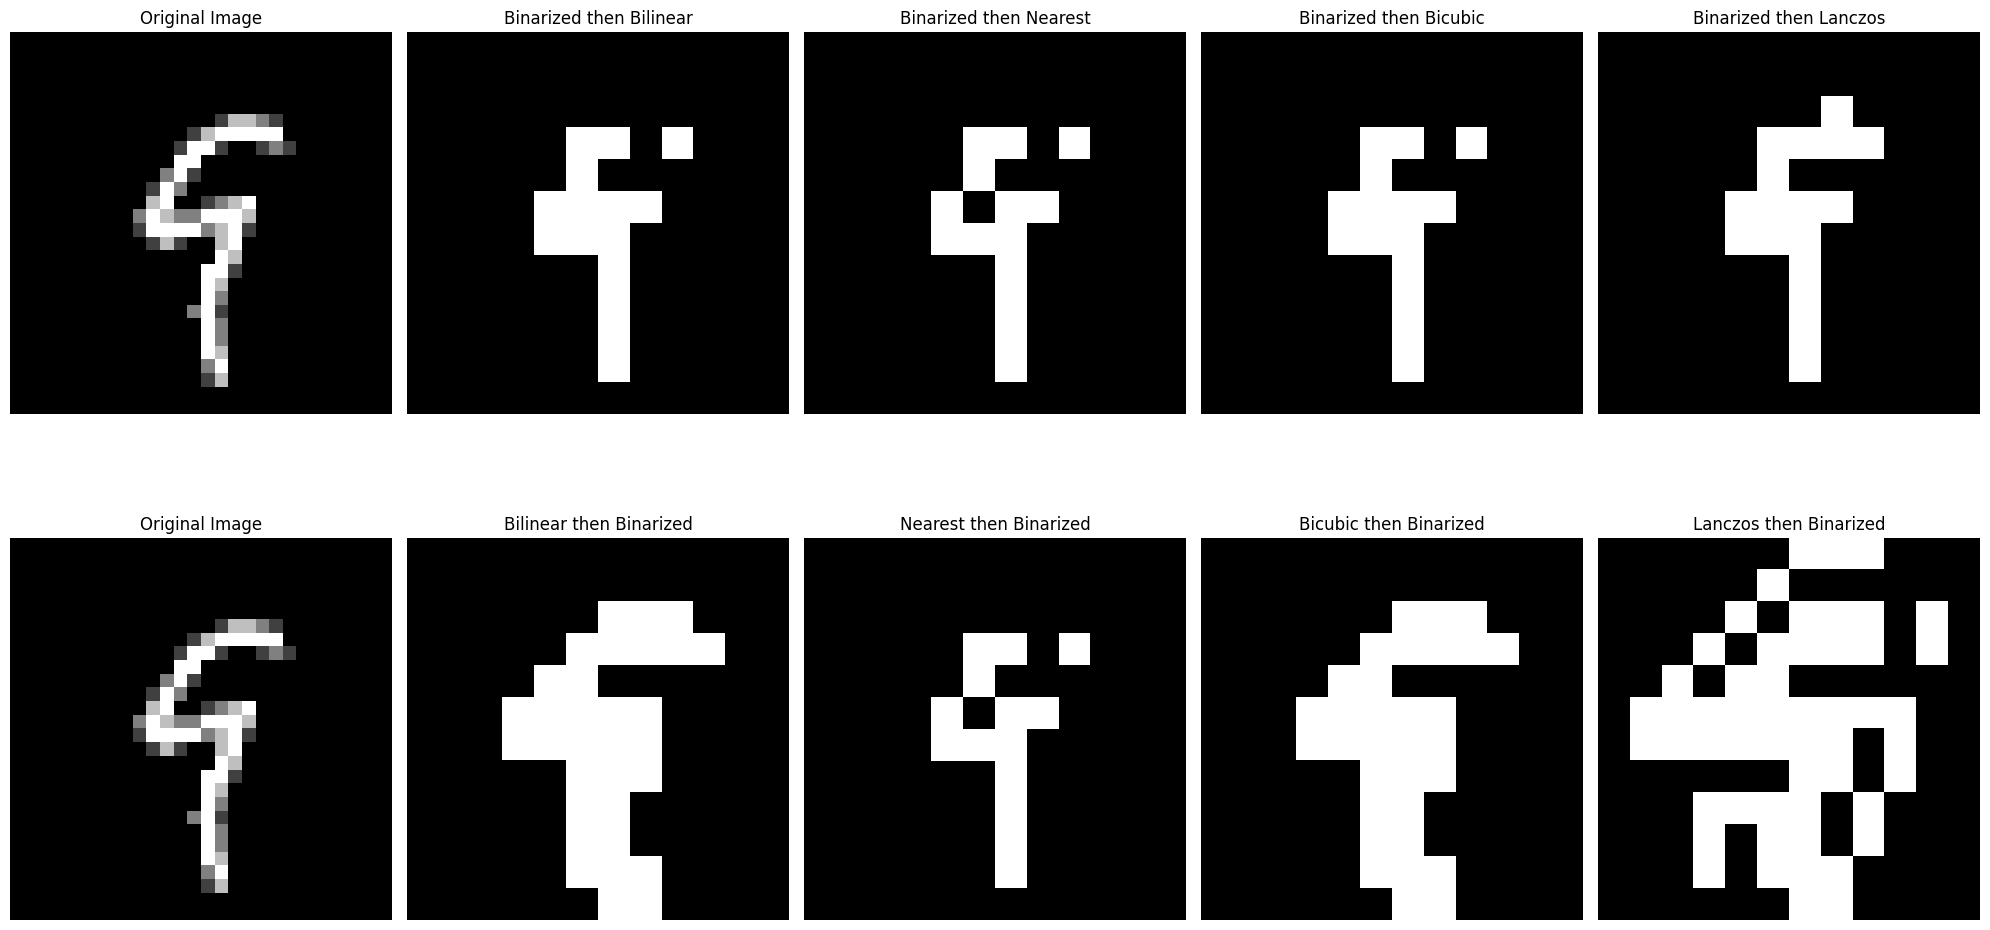

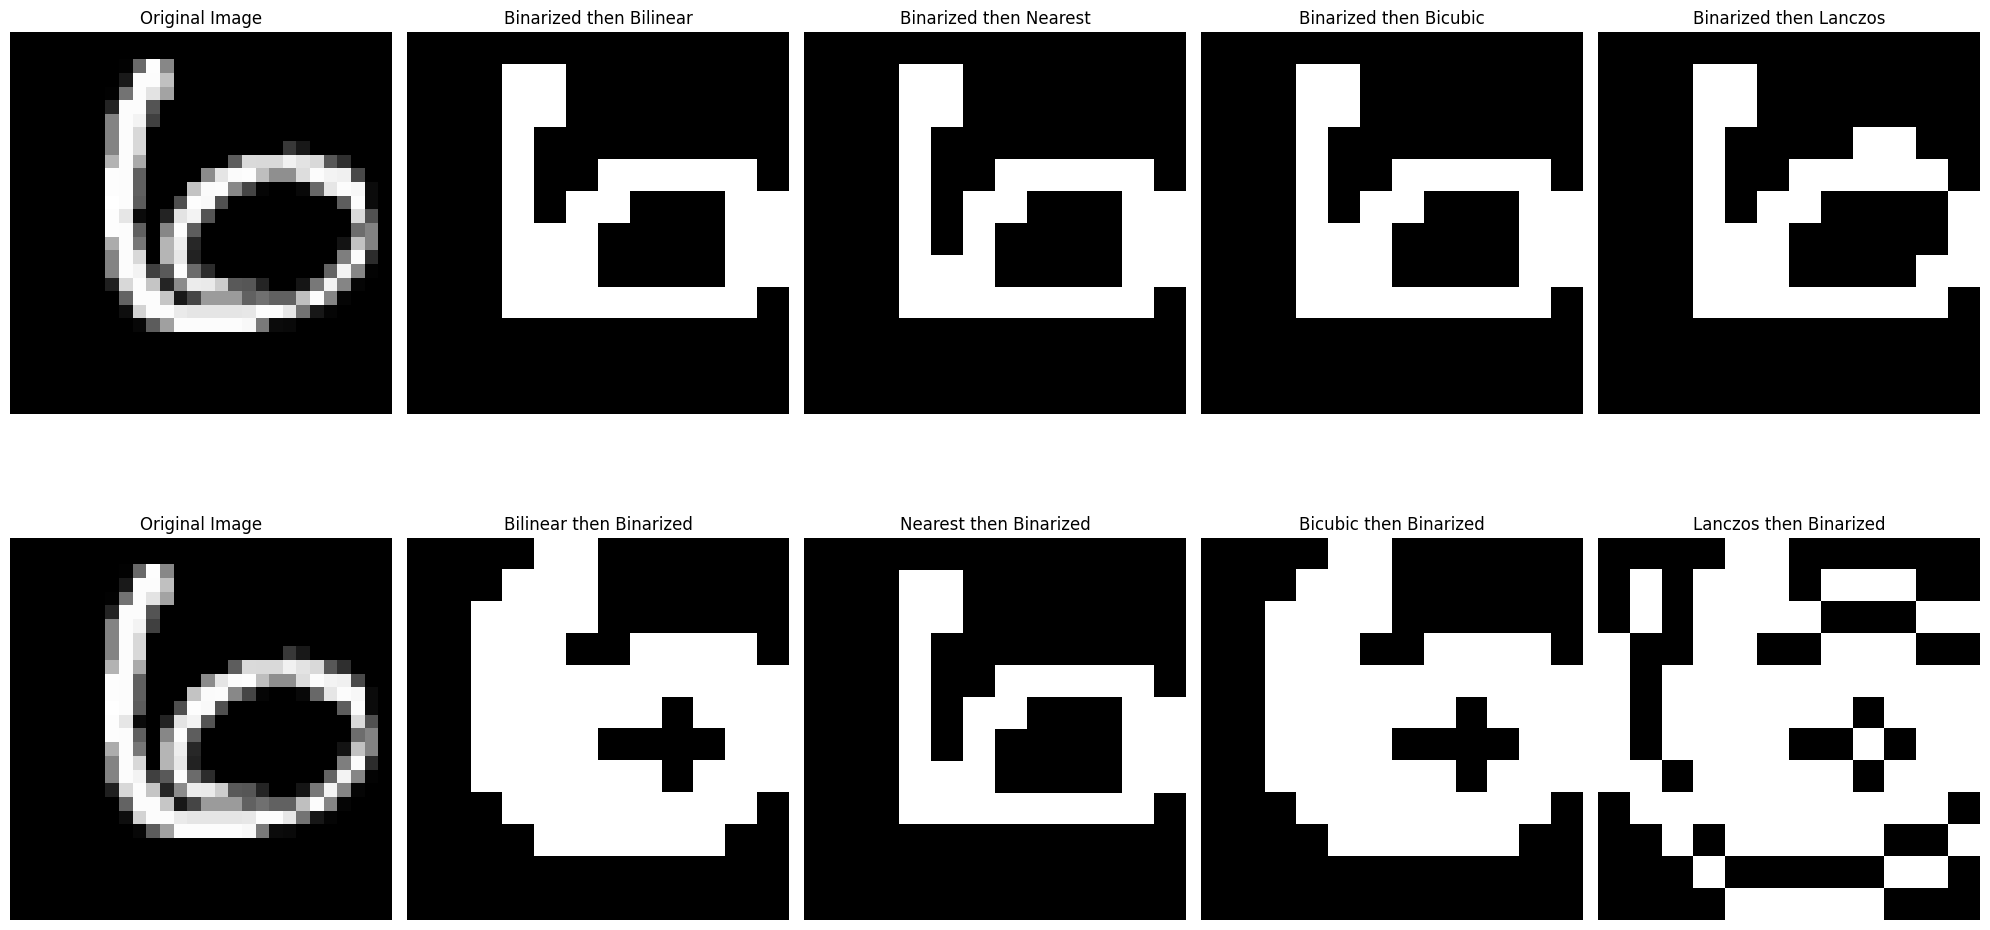

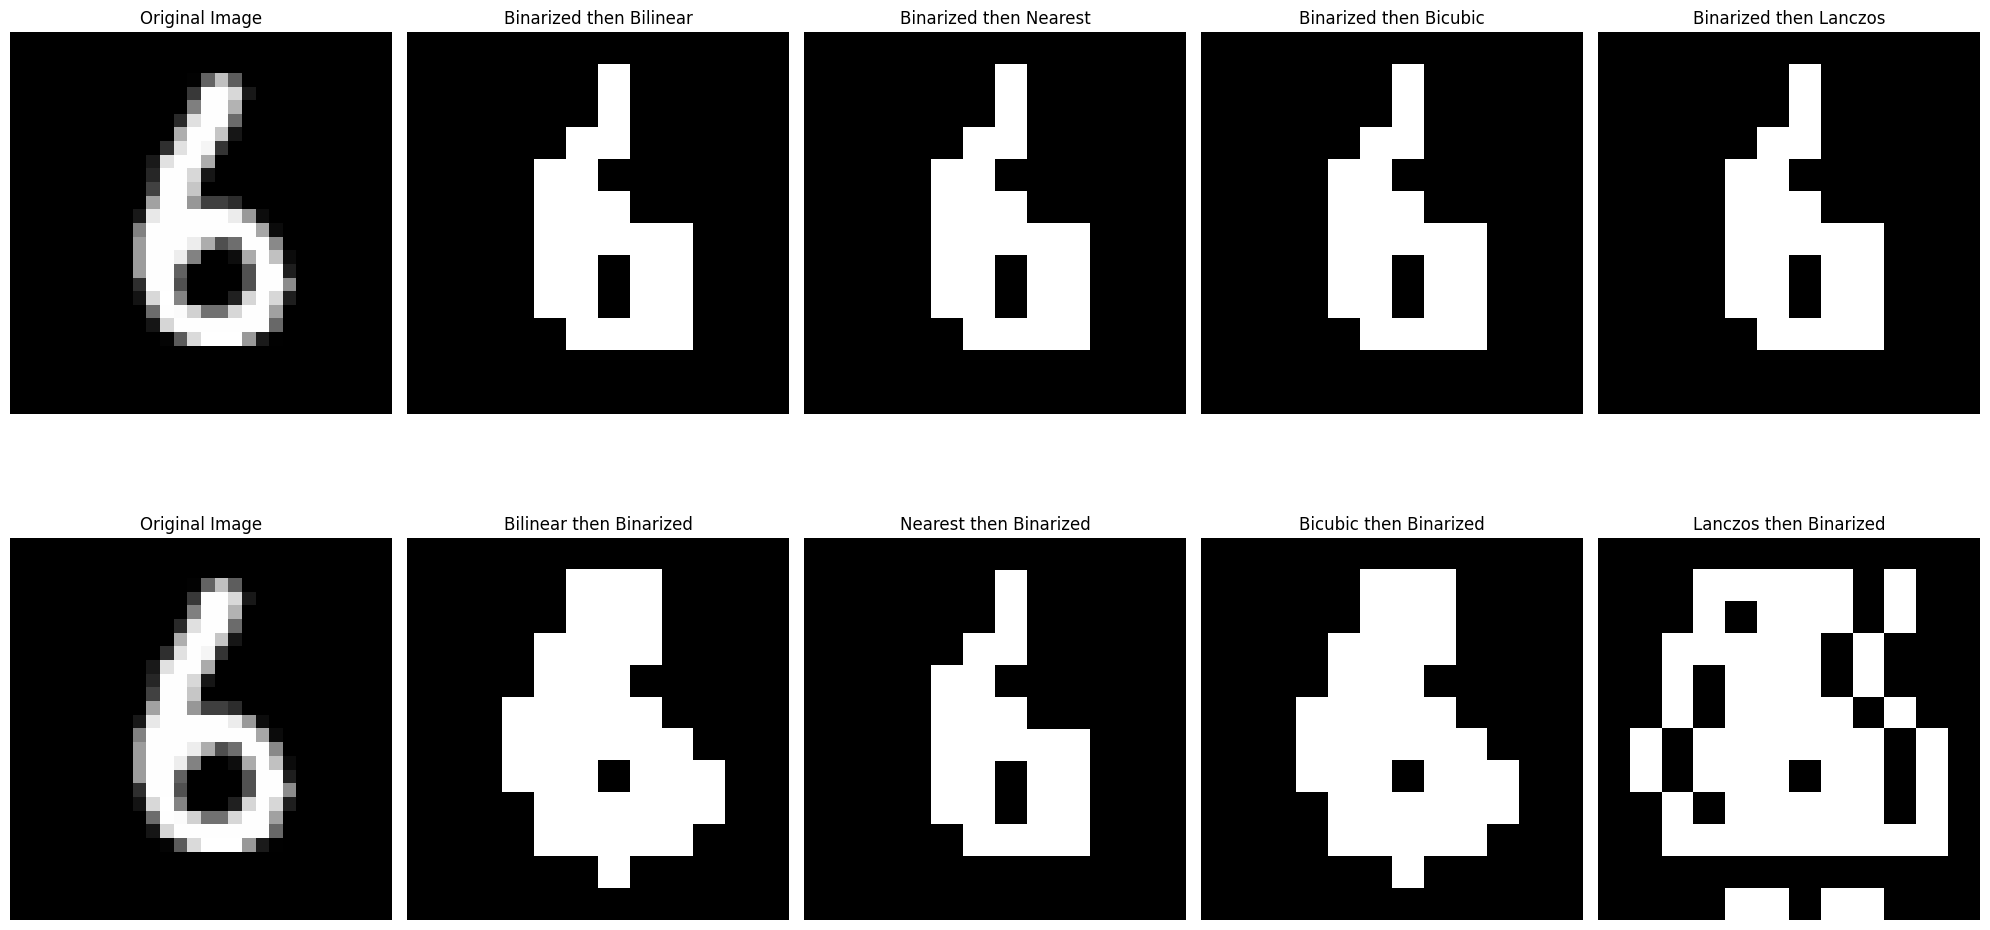

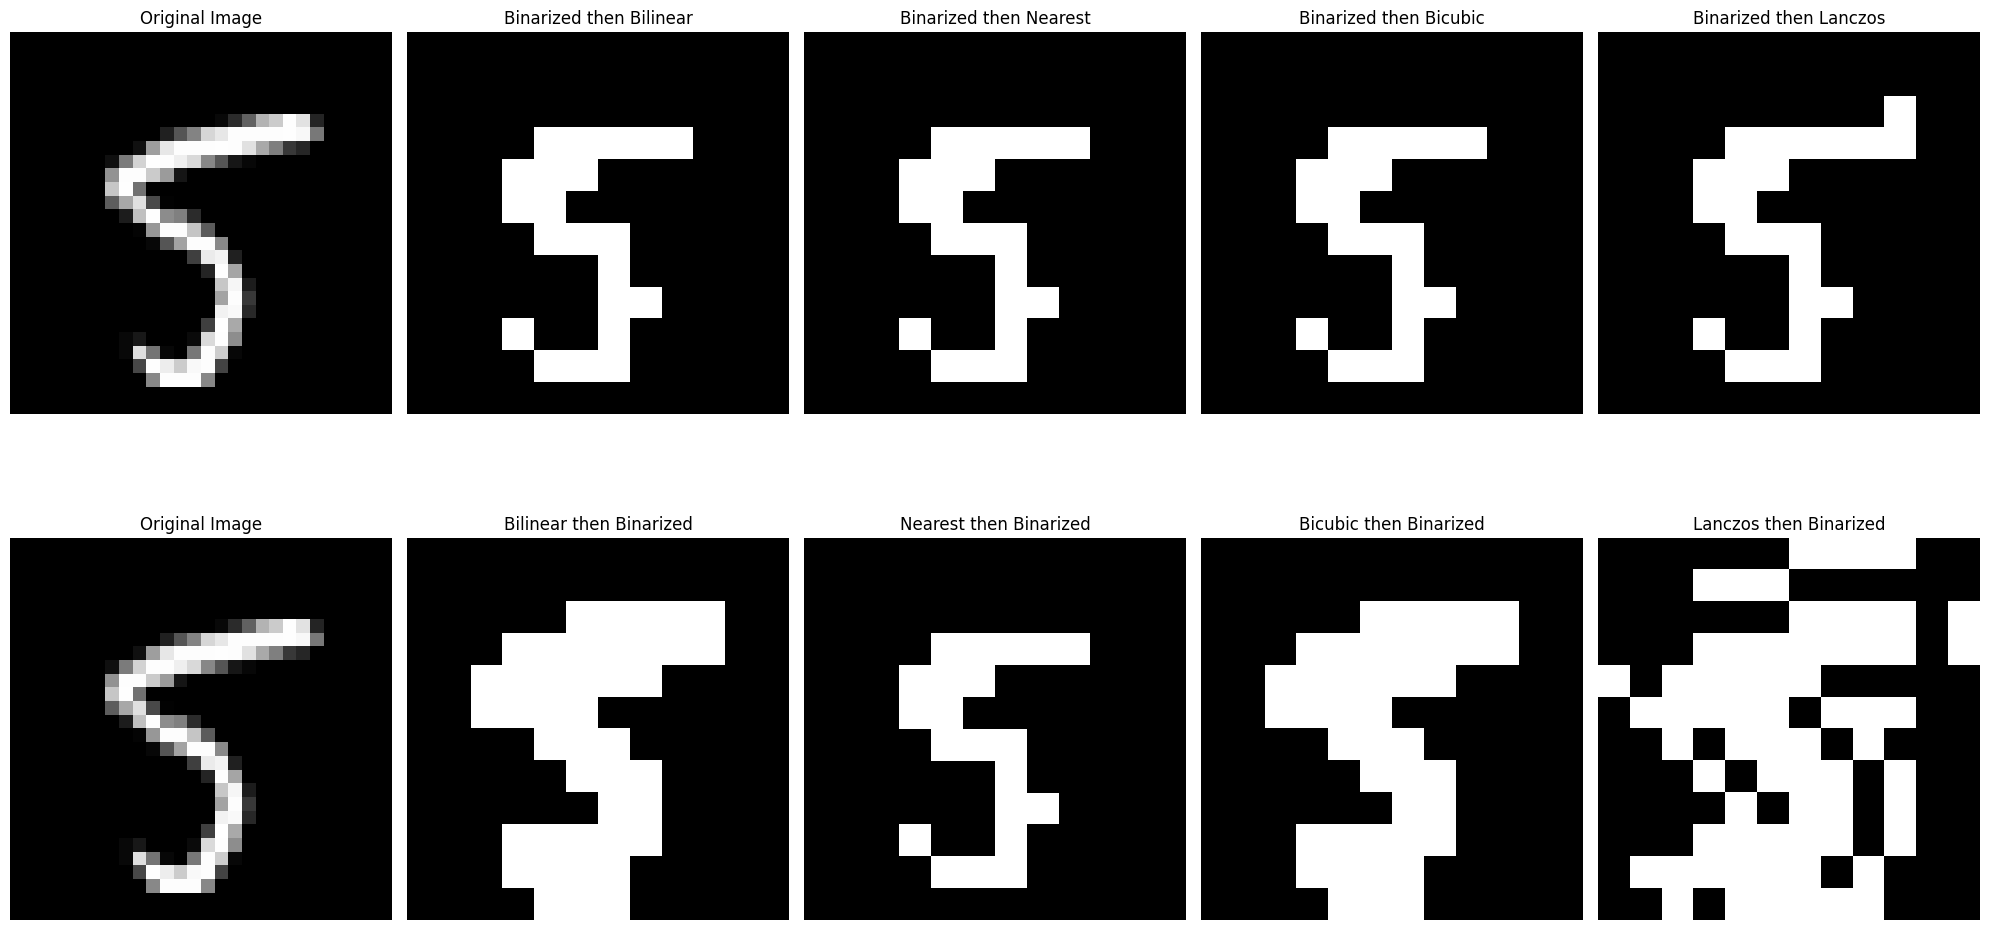

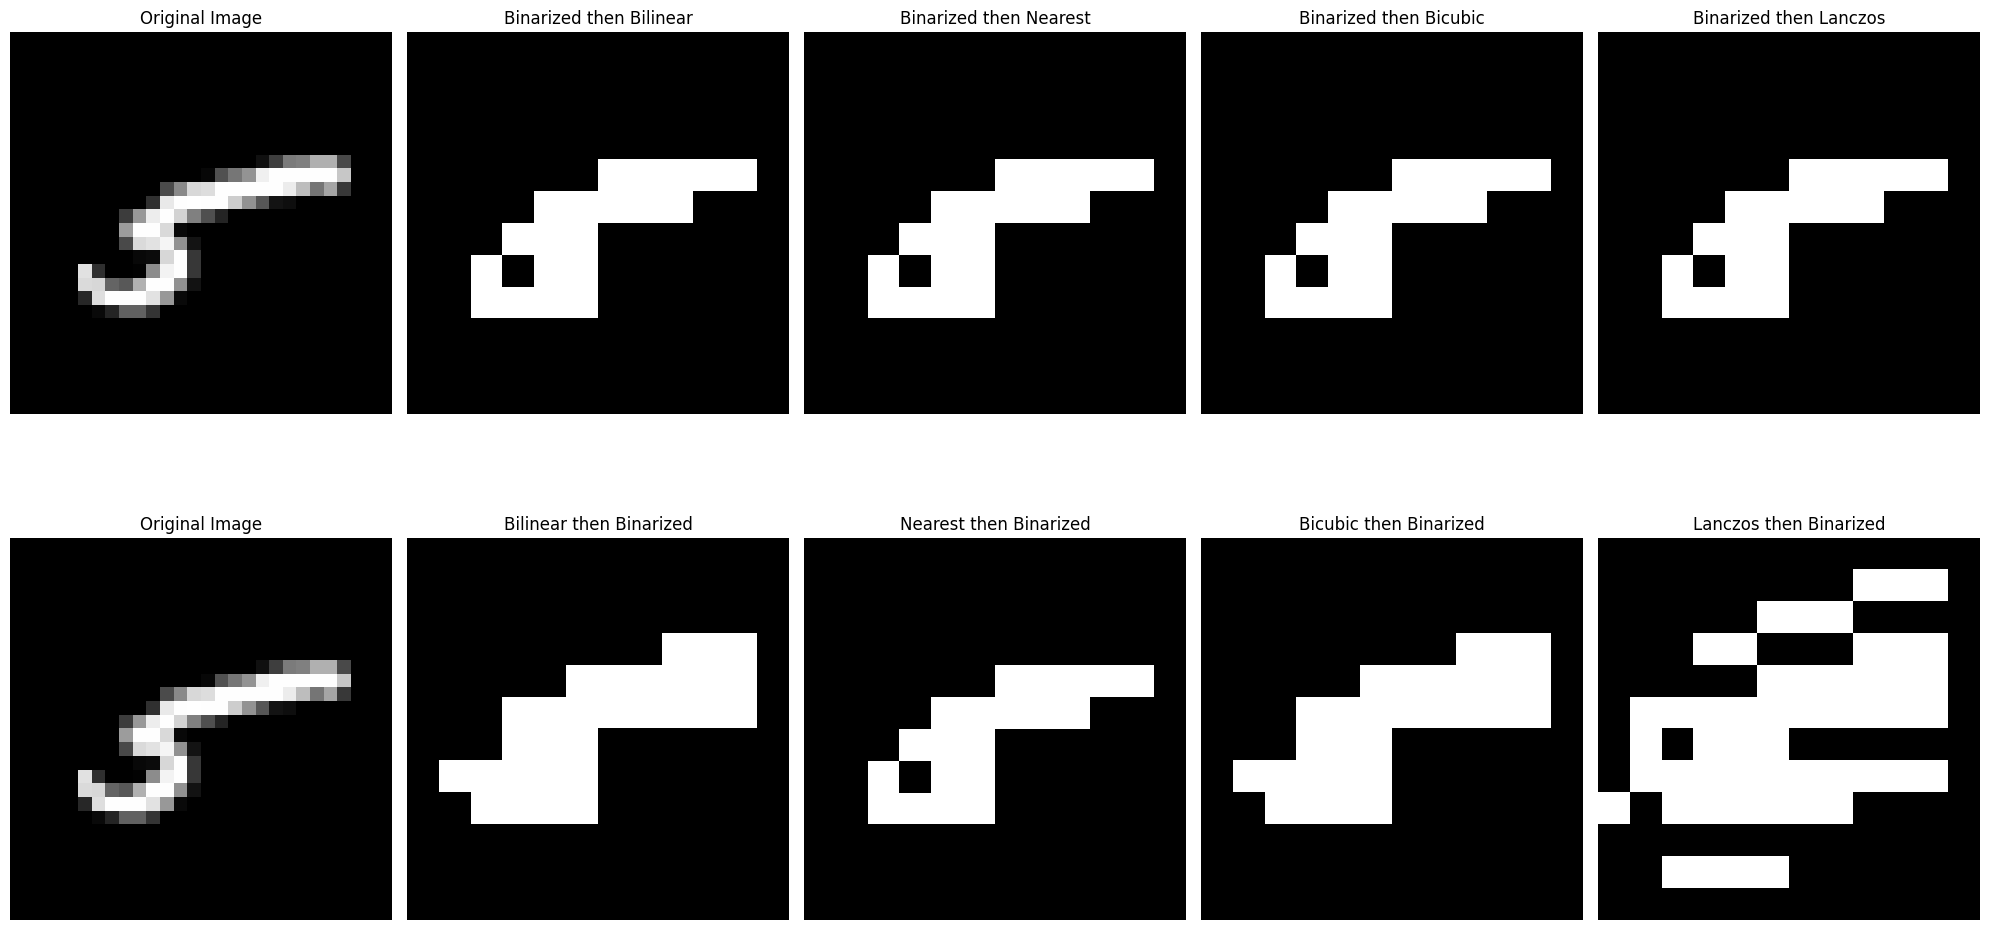

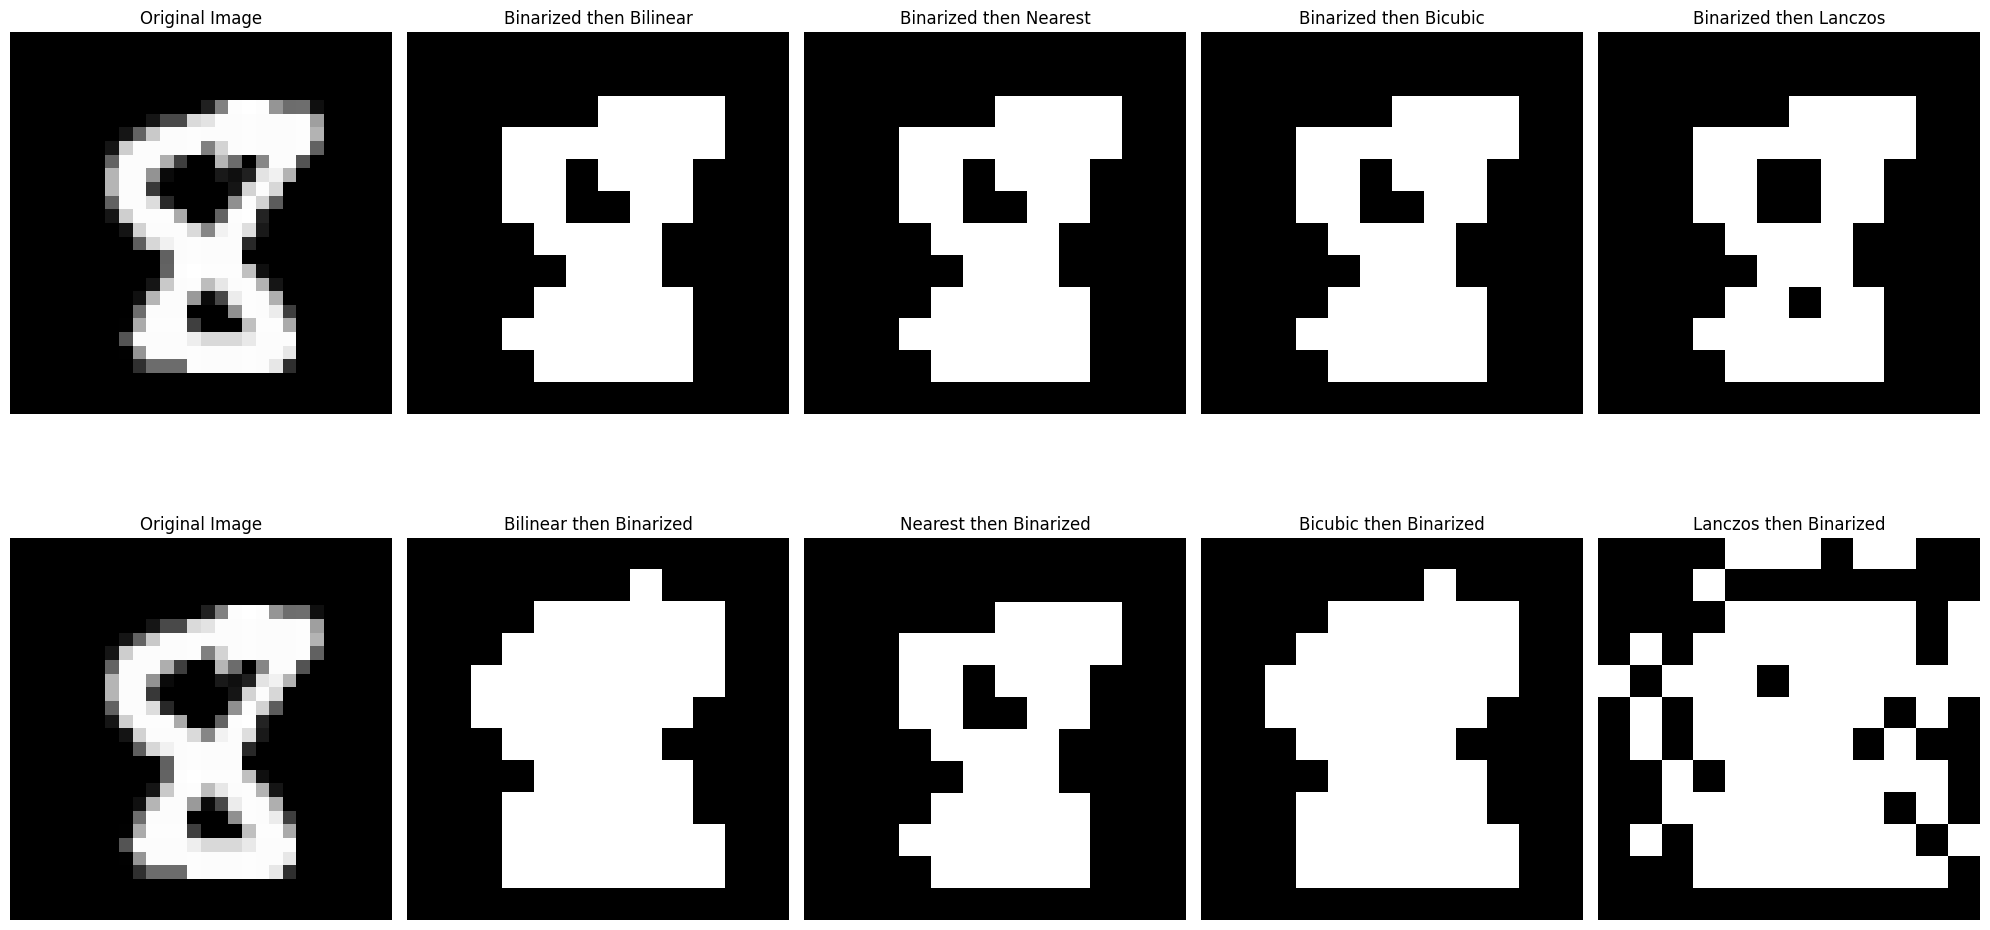

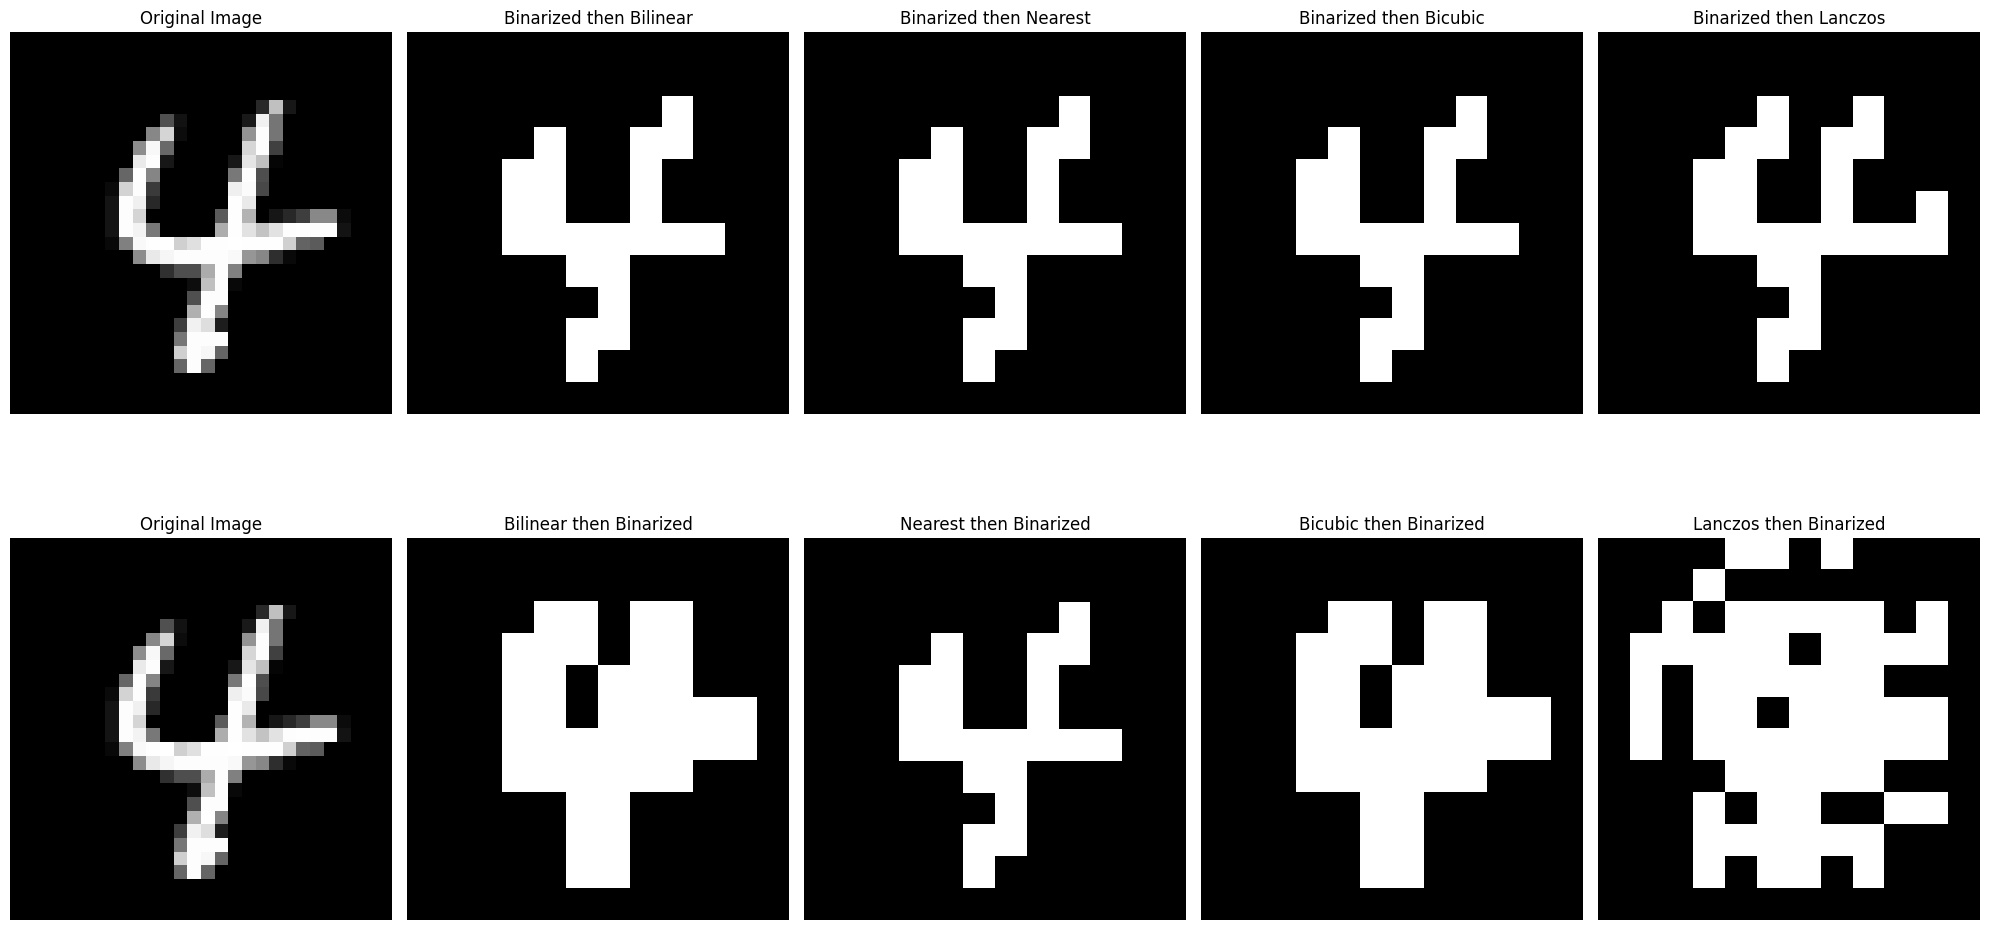

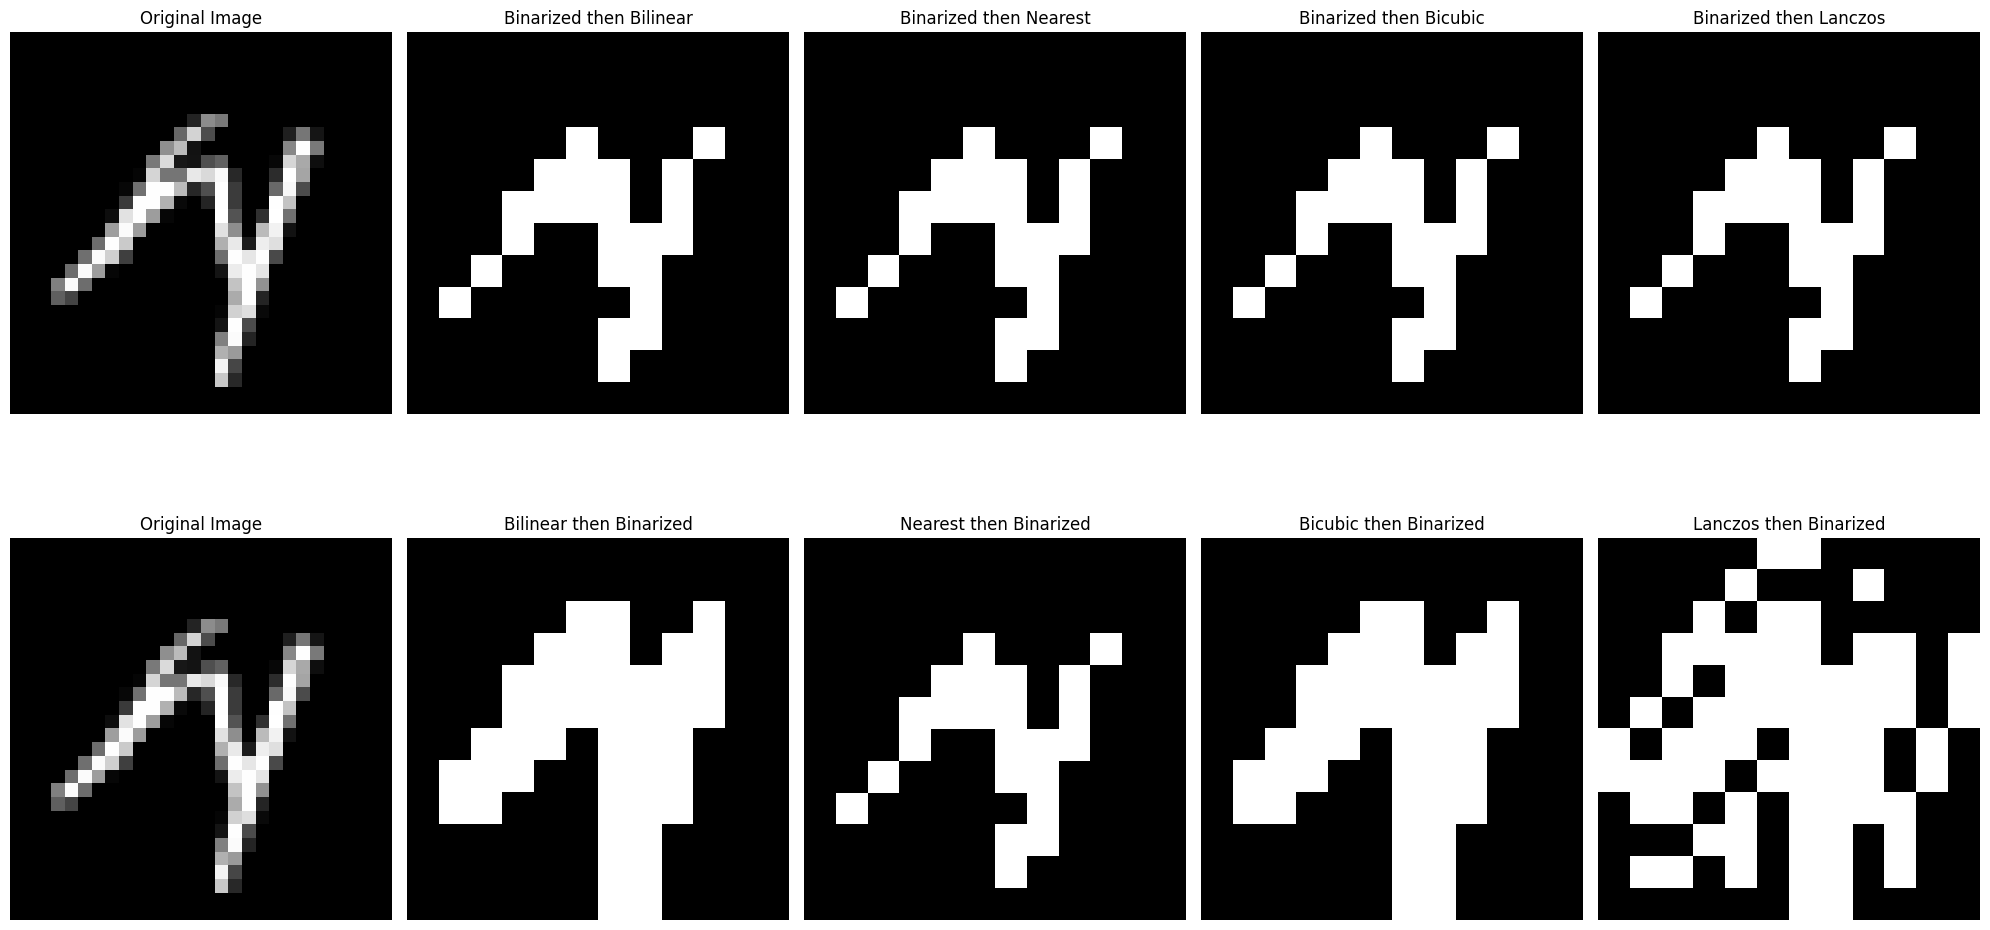

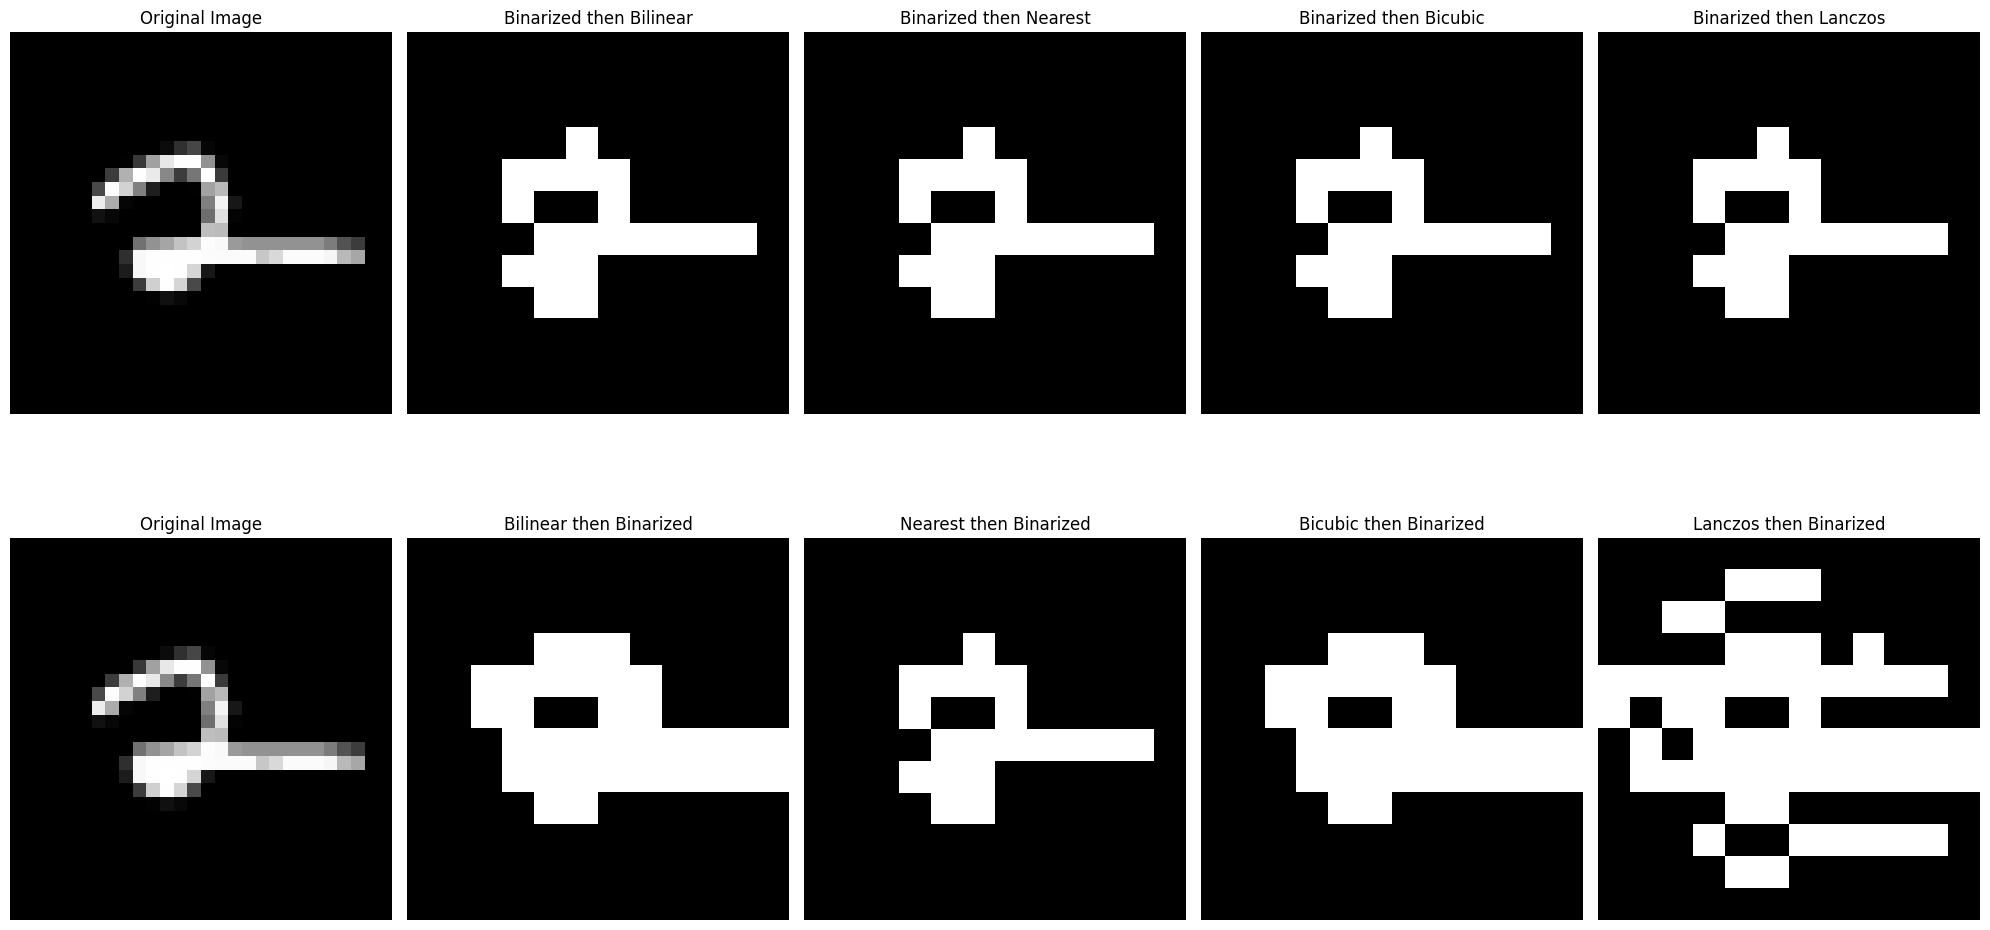

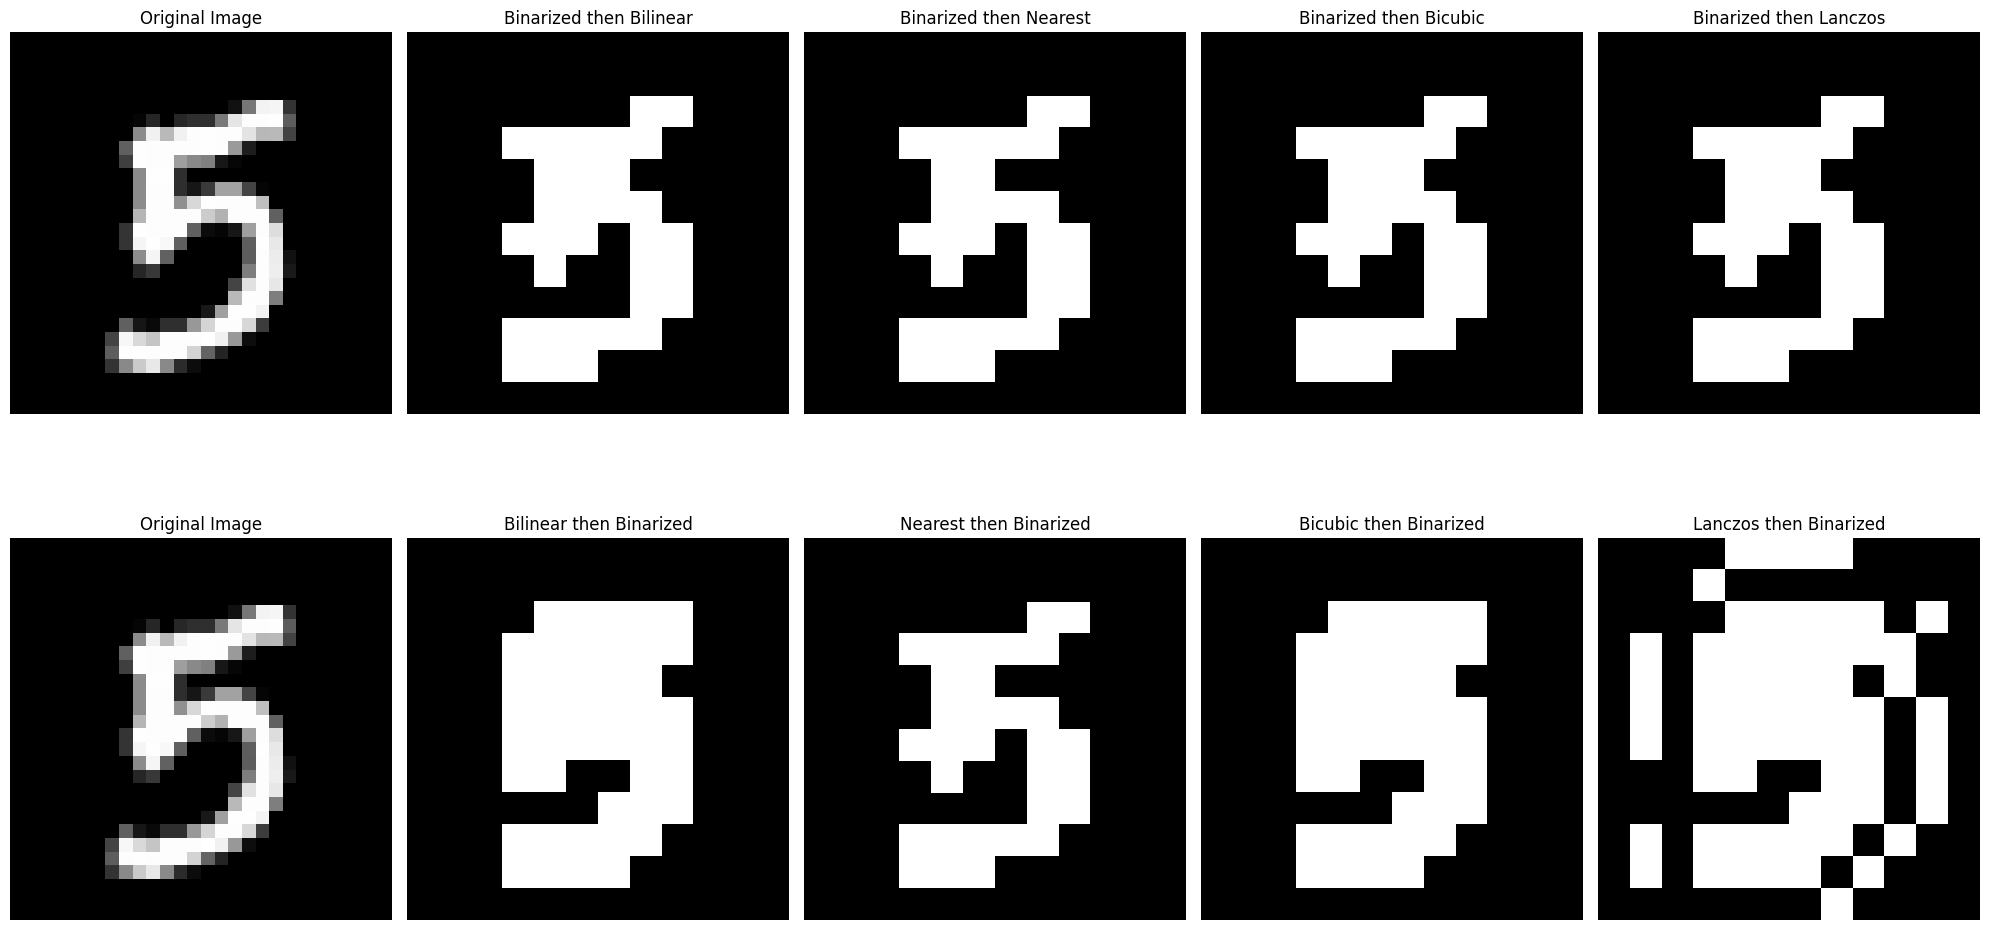

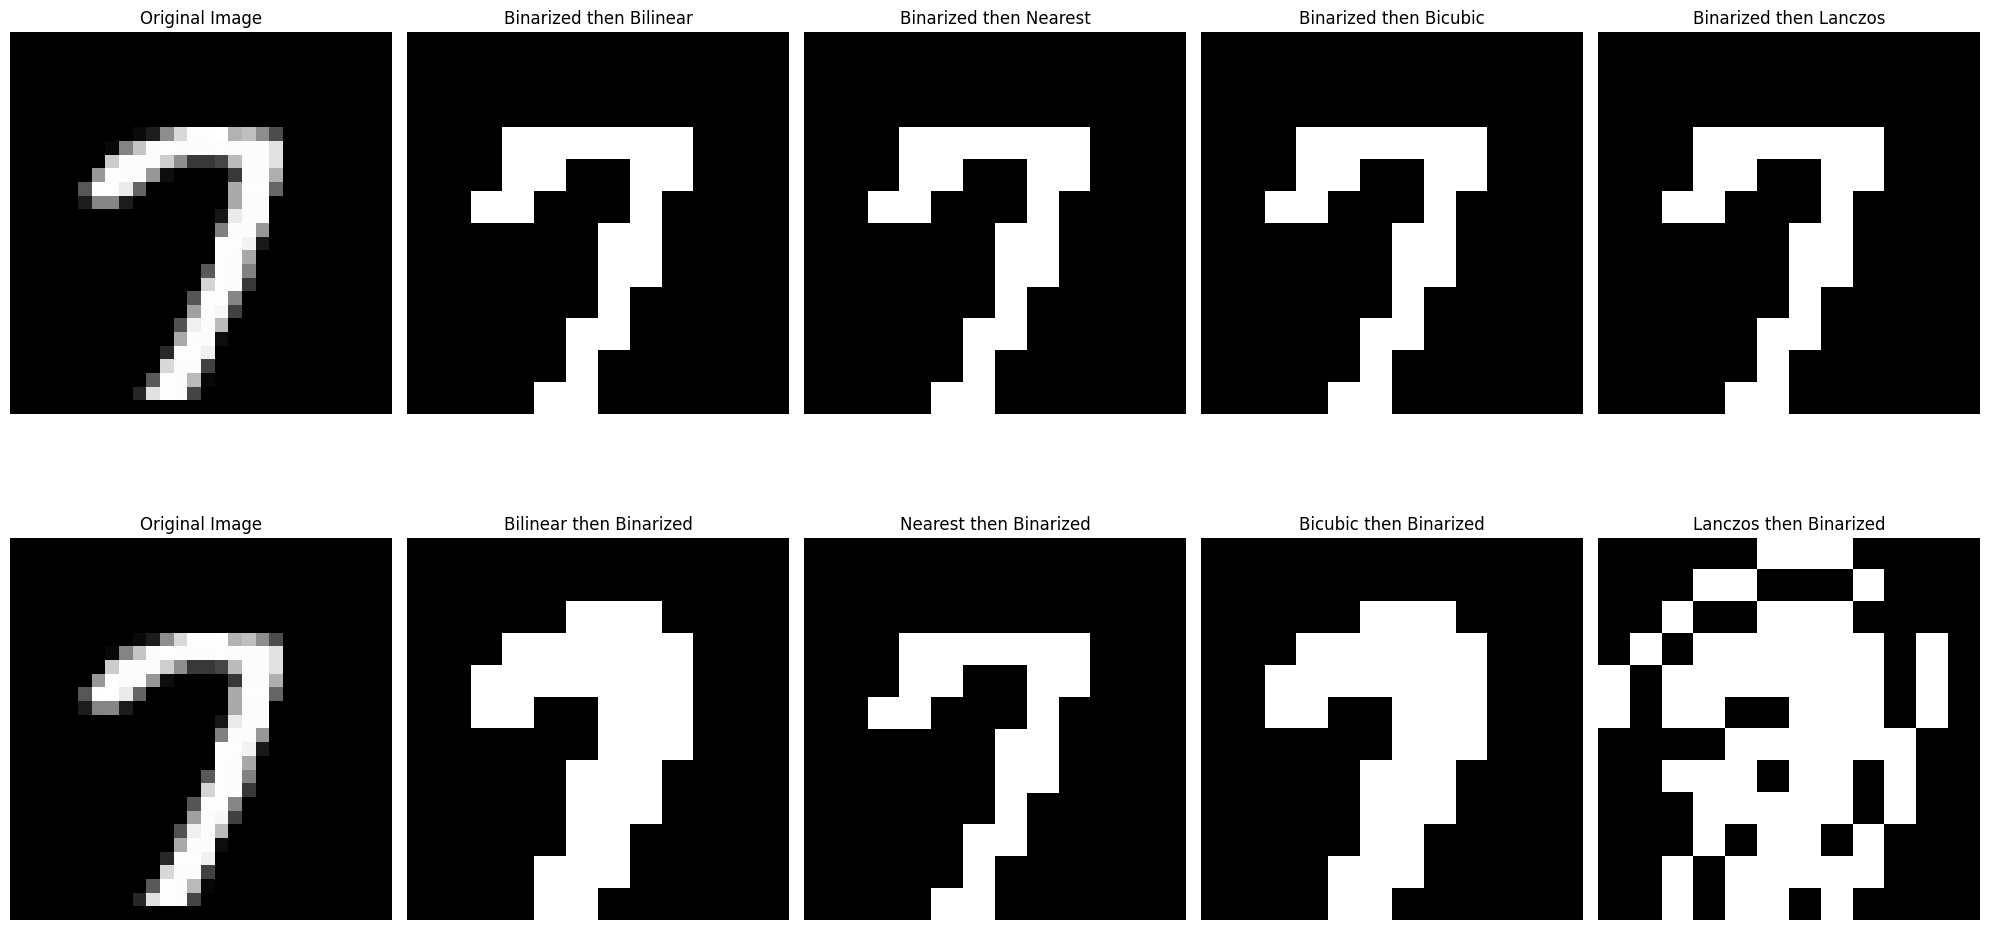

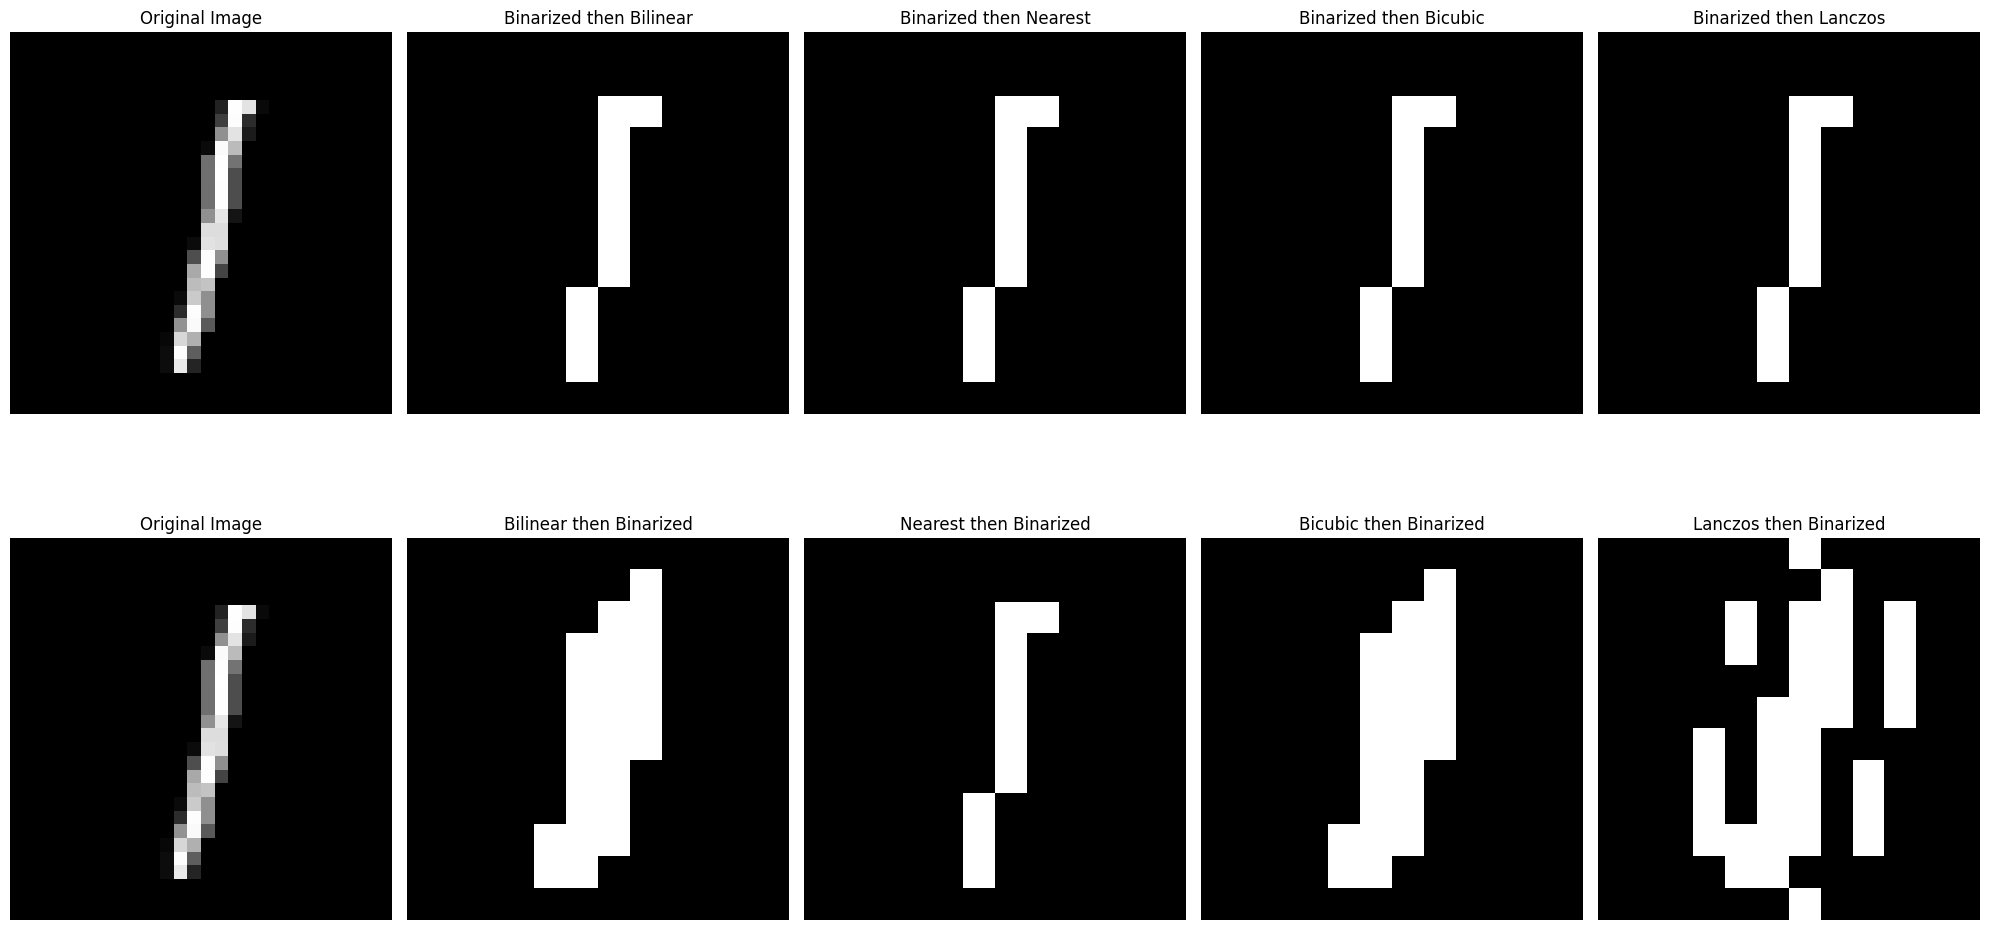

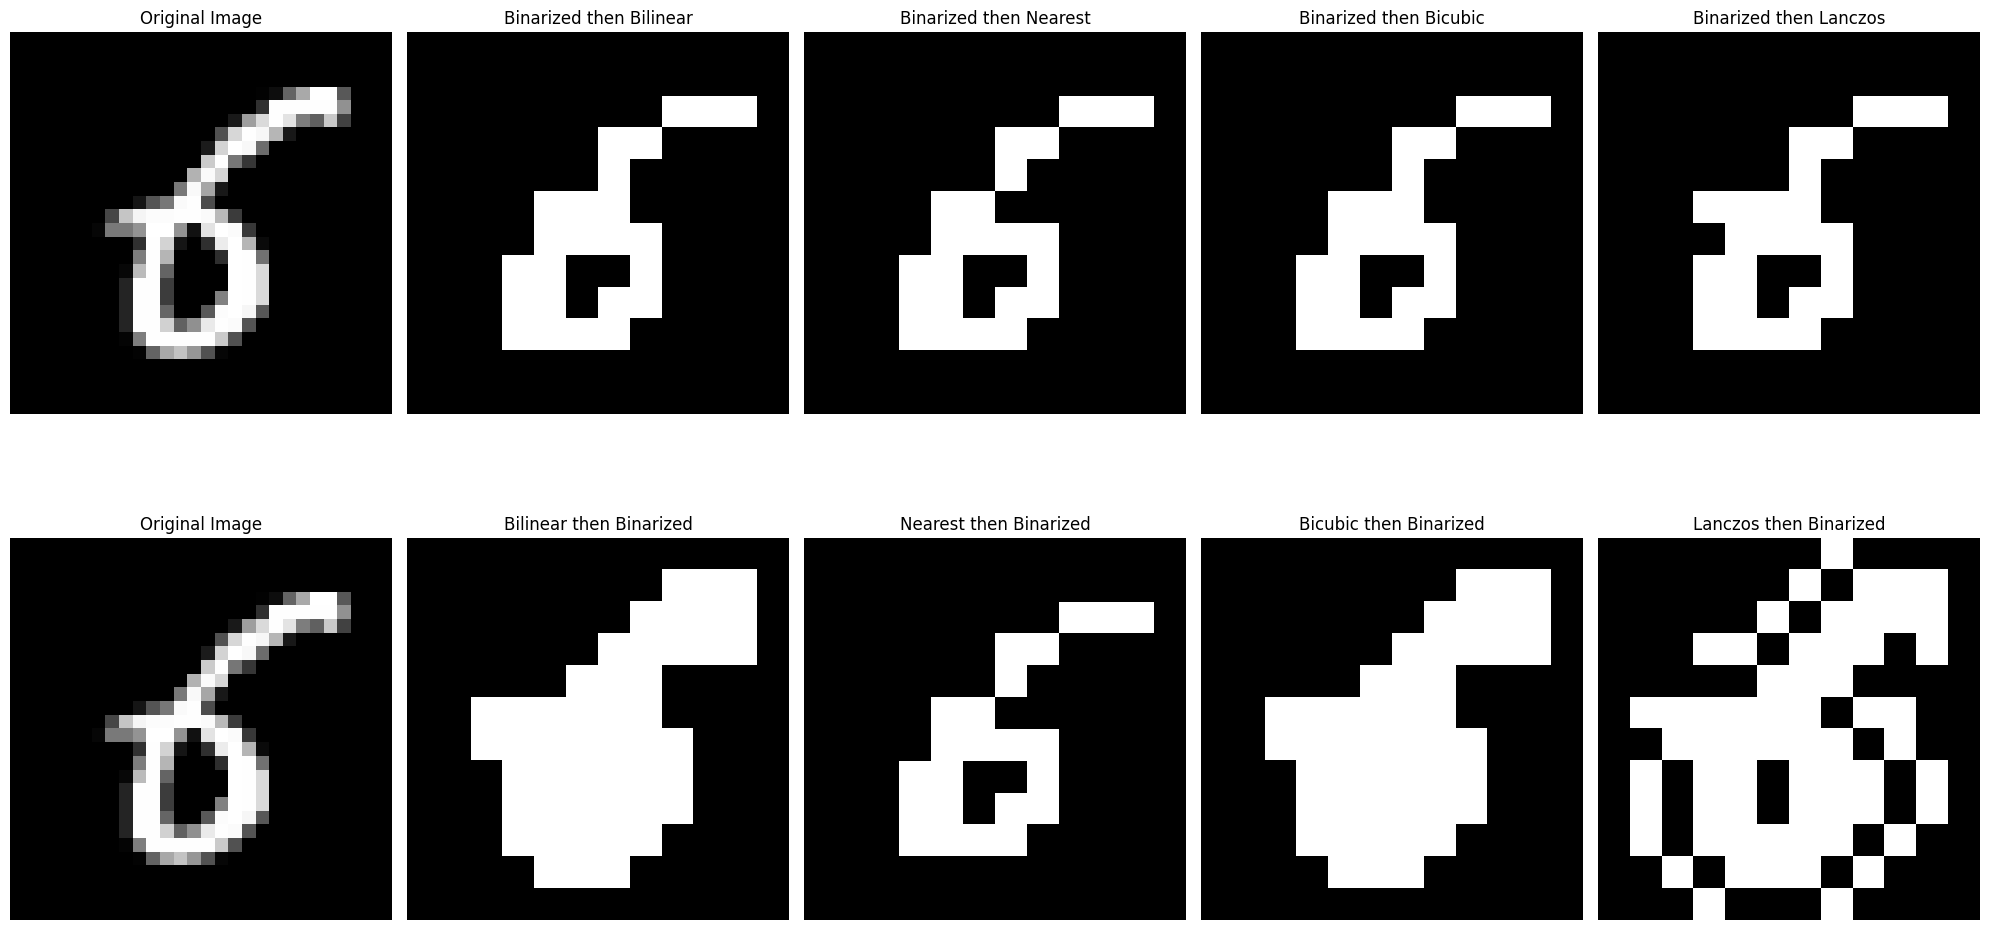

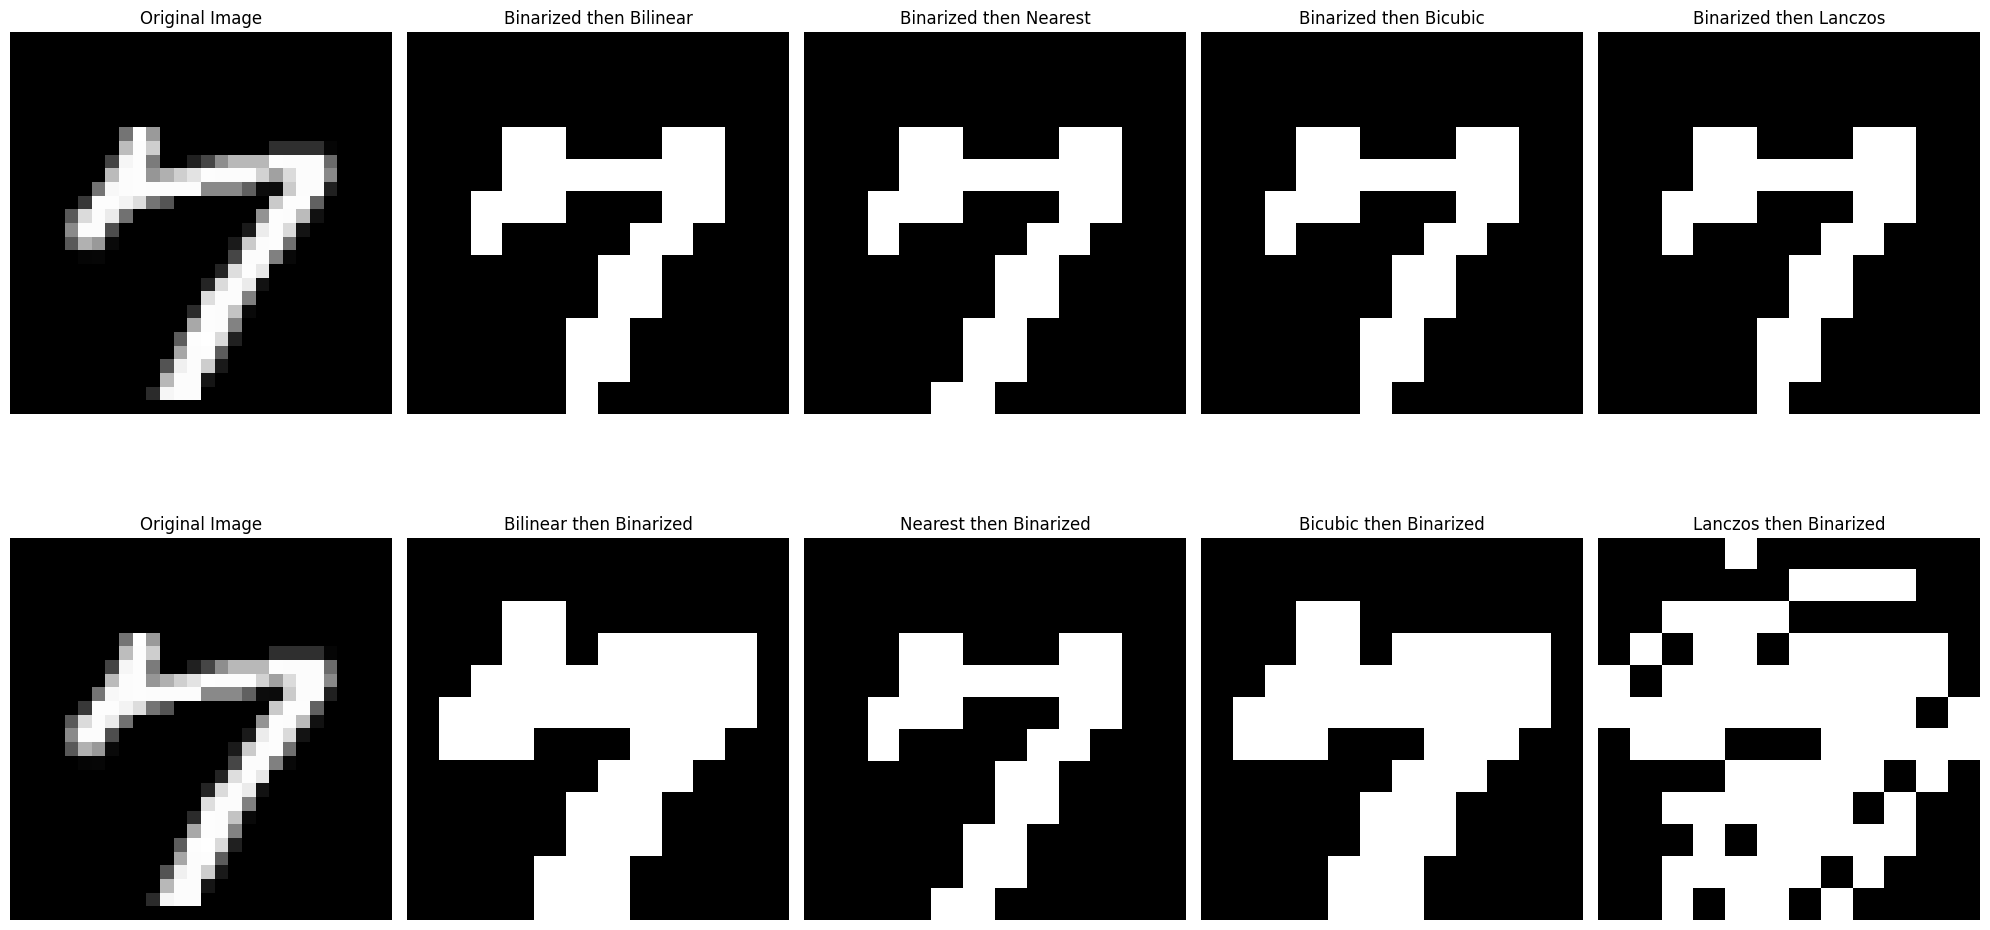

[2394,
 25044,
 8826,
 57656,
 69315,
 42237,
 34794,
 31227,
 18504,
 69446,
 30476,
 52339,
 60963,
 64838,
 58977]

In [61]:
# Usage
# X2 = np.array(X)

visualize_digits_sample(X, y)

# Conclusion: Binarize then Resize (Bilinear)

